In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
wave_path = "audio_data/Kanon D dur (Qurtet) - V.A.mp3"
waveform, sample_rate = librosa.load(wave_path, sr=None) 

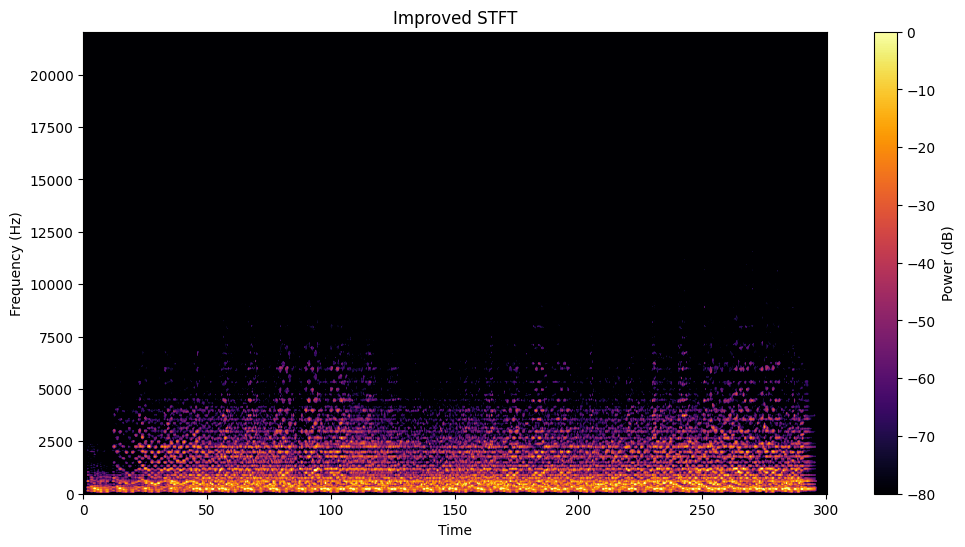

In [ ]:
frame_size = 1024
hop_size = 512
if len(waveform) % hop_size!= 0:
    frame_num = int((len(waveform) - frame_size) / hop_size) + 1
    pad_num = frame_num * hop_size - len(waveform) + frame_size
    waveform = np.pad(waveform, (0, pad_num), 'wrap')
frame_num = int((len(waveform) - frame_size) / hop_size) + 1

# 分帧
row = np.tile(np.arange(0, frame_size), (frame_num, 1)) # (frame_num, frame_size) 的矩阵, 行代表帧数, 列代表帧内采样点
column = np.tile(np.arange(0, frame_num * hop_size, hop_size), (frame_size, 1)).T # (frame_num, frame_size) 的矩阵, 表示每一帧在原始波形中的起始位置
index = row + column # 计算每一帧的所有采样点在原始波形中的全局索引。
waveform_frame = waveform[index] # 每行代表一帧，每列代表帧内的采样点

# 加窗
waveform_frame *= np.hamming(frame_size) # 防止频谱泄露

# FFT
n_fft = 1024 # FFT的点数
waveform_stft = np.fft.rfft(waveform_frame, n_fft) # 复数数组，每行对应一帧的频域表示
waveform_pow = np.abs(waveform_stft) ** 2/n_fft
waveform_db = 20 * np.log10(waveform_pow + 1e-12)
plt.figure(figsize=(12, 6))
plt.imshow(waveform_db.T,
           aspect='auto',
           origin='lower',
           extent=[0, len(waveform)/sample_rate, 0, sample_rate/2],
           cmap='inferno',
           vmin=-80, vmax=0)
plt.colorbar(label='Power (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time')
plt.title('Improved STFT')
plt.show()